# Data Analysis
**Part 1**

Analyzing different fields to understand in which scenerios, there are more chances of default.

In [1]:
import pandas as pd
import os

In [2]:
csv_path = "data/data.csv"
df = pd.read_csv(csv_path)
df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             233154 non-null  int64  
 1   DISBURSED_AMOUNT                     233154 non-null  int64  
 2   ASSET_COST                           233154 non-null  int64  
 3   LTV                                  233154 non-null  float64
 4   BRANCH_ID                            233154 non-null  int64  
 5   SUPPLIER_ID                          233154 non-null  int64  
 6   MANUFACTURER_ID                      233154 non-null  int64  
 7   CURRENT_PINCODE_ID                   233154 non-null  int64  
 8   DATE_OF_BIRTH                        233154 non-null  object 
 9   EMPLOYMENT_TYPE                      225493 non-null  object 
 10  DISBURSAL_DATE                       233154 non-null  object 
 11  STATE_ID     

In [4]:
import matplotlib.pyplot as plt

In [5]:
# Finding the Null values
df.isnull().sum()

UNIQUEID                                  0
DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
BRANCH_ID                                 0
SUPPLIER_ID                               0
MANUFACTURER_ID                           0
CURRENT_PINCODE_ID                        0
DATE_OF_BIRTH                             0
EMPLOYMENT_TYPE                        7661
DISBURSAL_DATE                            0
STATE_ID                                  0
EMPLOYEE_CODE_ID                          0
MOBILENO_AVL_FLAG                         0
AADHAR_FLAG                               0
PAN_FLAG                                  0
VOTERID_FLAG                              0
DRIVING_FLAG                              0
PASSPORT_FLAG                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

In [6]:
# Calculating percentage of null data
total_null = df.isnull().sum()
percent_null = (total_null/(df.isnull().count())) * 100
missing_data = pd.concat([total_null,percent_null], keys=['Total','Percent'],axis=1)
print(missing_data)

                                     Total   Percent
UNIQUEID                                 0  0.000000
DISBURSED_AMOUNT                         0  0.000000
ASSET_COST                               0  0.000000
LTV                                      0  0.000000
BRANCH_ID                                0  0.000000
SUPPLIER_ID                              0  0.000000
MANUFACTURER_ID                          0  0.000000
CURRENT_PINCODE_ID                       0  0.000000
DATE_OF_BIRTH                            0  0.000000
EMPLOYMENT_TYPE                       7661  3.285811
DISBURSAL_DATE                           0  0.000000
STATE_ID                                 0  0.000000
EMPLOYEE_CODE_ID                         0  0.000000
MOBILENO_AVL_FLAG                        0  0.000000
AADHAR_FLAG                              0  0.000000
PAN_FLAG                                 0  0.000000
VOTERID_FLAG                             0  0.000000
DRIVING_FLAG                             0  0.

In [7]:
# Removing the null values from dataset
df.dropna()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,01-08-1988,Salaried,...,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,05-12-1988,Self employed,...,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,01-06-1976,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-1994,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


**Histogram**

Finding the Histogram of Loan Default (1 means defaulted and 0 means not defaulted)

Text(0, 0.5, 'Count')

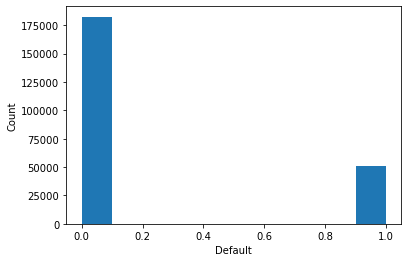

In [8]:
plt.hist(df['LOAN_DEFAULT'])
plt.xlabel("Default")
plt.ylabel("Count")

In [9]:
def histogram(feature):
    defaulted = df[df['LOAN_DEFAULT'] == 1][feature].value_counts()
    not_defaulted = df[df['LOAN_DEFAULT'] == 0][feature].value_counts()
    new_df = pd.DataFrame([defaulted, not_defaulted])
    new_df.index = ['Defaulted', 'Not Defaulted']
    new_df.plot(kind='bar', stacked=True, figsize=(10, 5))


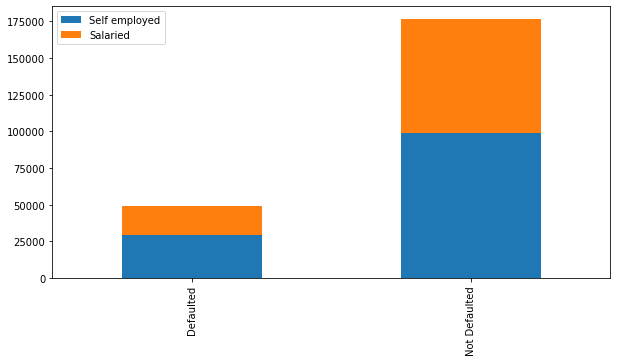

In [10]:
# Employment Type Histogram
histogram('EMPLOYMENT_TYPE')

**Data Splitting**  
Separating data of defaulted and non deaulted into separate dataframes

In [11]:
defaulted = df.loc[df['LOAN_DEFAULT'] == 1]
not_defaulted = df.loc[df['LOAN_DEFAULT'] == 0]
# defaulted.info()

In [12]:
import seaborn as sns
from scipy import stats

In [13]:
def plot_1(df, col, target):
    plt.title(col.replace('_',' '), fontsize=16, y=1.01)
    sns.distplot(df[col], kde=False)
    plt.xlabel(col.lower().replace('_',' '))
    plt.ylabel("Count")
    
    
def plot_2(df1,df2, col, target):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,4))
    fig.suptitle(col.replace('_',' '), fontsize=16, y=1.01)
    sns.distplot(df1[col], kde=False, ax=ax1)
    ax1.set(xlabel=col.replace('_',' '), ylabel='Count', title='Defaulted')  
    sns.distplot(df2[col], kde=False, ax=ax2)
    ax2.set(xlabel=col.replace('_',' '), ylabel='Count', title='Not Defaulted')


**Plots**  
Below I have plotted different features of defaluted and non-defaulted to check that which features occures most in each category.

/home/abdul/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


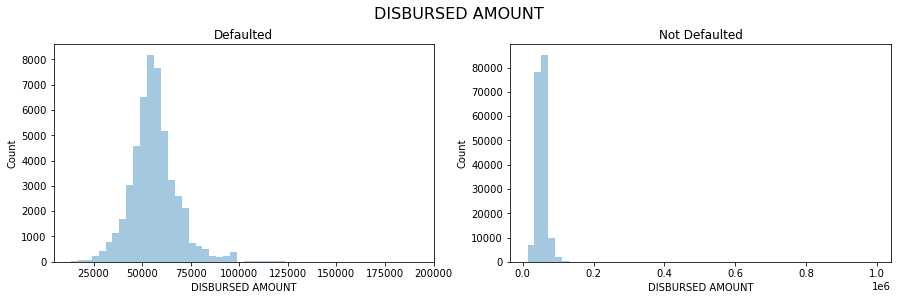

In [14]:
# plot_1(defaulted, 'DISBURSED_AMOUNT', 'LOAN_DEFAULT')
plot_2(defaulted, not_defaulted, 'DISBURSED_AMOUNT', 'LOAN_DEFAULT')

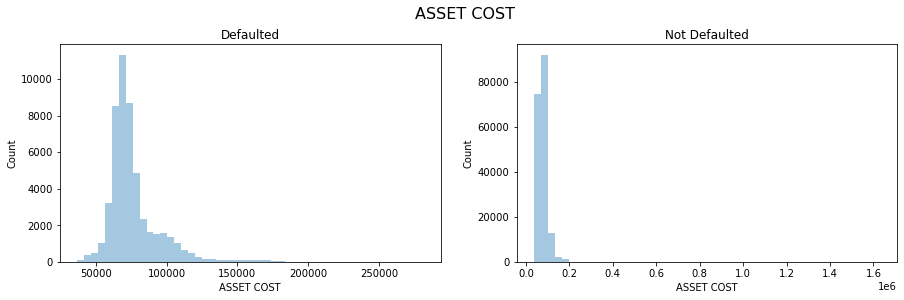

In [15]:
# plot_1(defaulted, 'ASSET_COST', 'LOAN_DEFAULT')
plot_2(defaulted, not_defaulted, 'ASSET_COST', 'LOAN_DEFAULT')

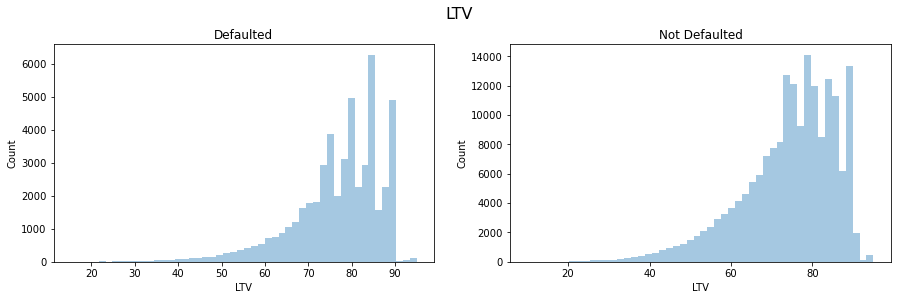

In [16]:
# plot_1(defaulted, 'LTV', 'LOAN_DEFAULT')
plot_2(defaulted, not_defaulted, 'LTV', 'LOAN_DEFAULT')

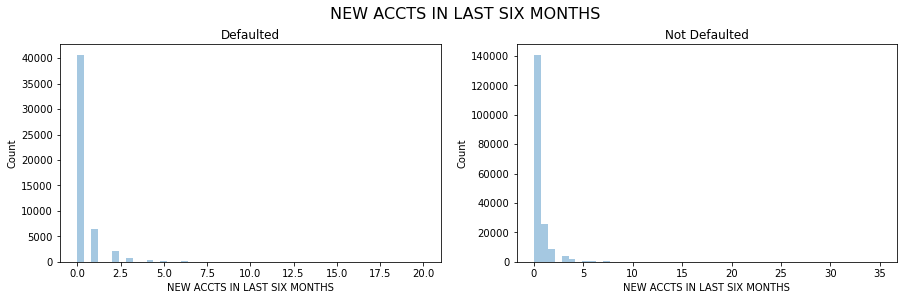

In [47]:
plot_2(defaulted, not_defaulted, 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'LOAN_DEFAULT')

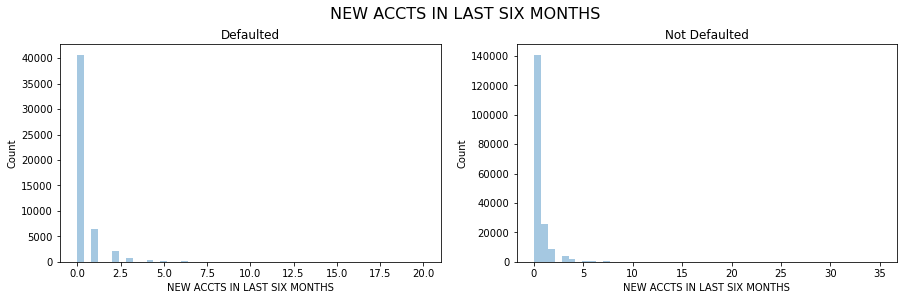

In [48]:
plot_2(defaulted, not_defaulted, 'CREDIT_HISTORY_LENGTH', 'LOAN_DEFAULT')

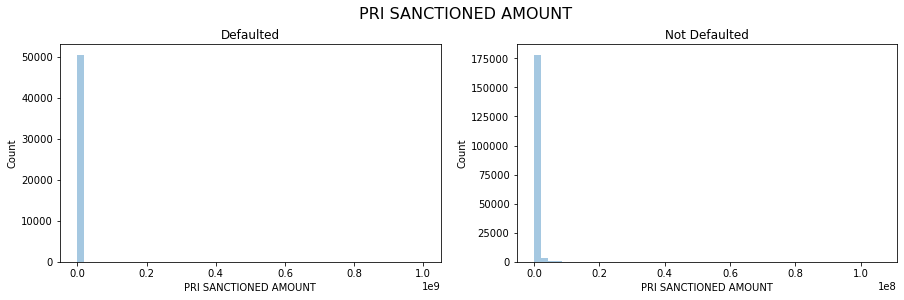

In [49]:
plot_2(defaulted, not_defaulted, 'PRI_SANCTIONED_AMOUNT', 'LOAN_DEFAULT')

**Visualizing Differently**  
Type of Employment seems to be a good feature for analyzing default behaviour. I have plotted graphs for salaried versus self employed people. We should use percentages instead of count in order to get better insights but due to timing constraint, I am only doing it with counts.

/home/abdul/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/abdul/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


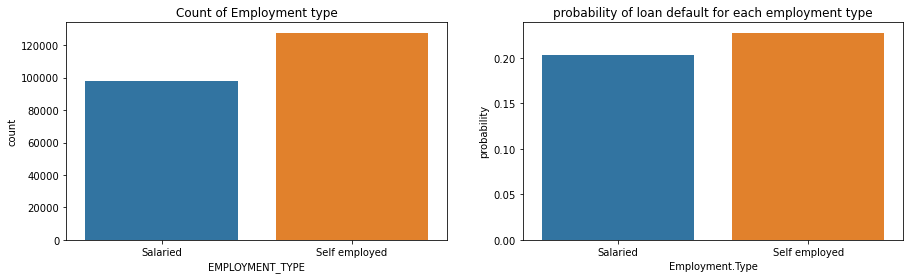

In [87]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 4))
sns.countplot(df['EMPLOYMENT_TYPE'].fillna('missing'), ax=ax[0])
ax[0].set(title="Count of Employment type")
x = df[['EMPLOYMENT_TYPE', 'LOAN_DEFAULT']].fillna('missing').groupby(['EMPLOYMENT_TYPE'])['LOAN_DEFAULT'].mean()
sns.barplot(x.index, x.values, ax=ax[1])
ax[1].set(title='probability of loan default for each employment type', ylabel='probability', xlabel='Employment.Type')
plt.show()

**Part 2**

Now we are analyzing using one of the demographic data (Age of Customer)

In [61]:
# Changing the format of Date
defaulted['DATE_OF_BIRTH'] = pd.to_datetime(defaulted['DATE_OF_BIRTH'], dayfirst=True)
defaulted['DISBURSAL_DATE'] = pd.to_datetime(defaulted['DISBURSAL_DATE'], dayfirst=True)
not_defaulted['DATE_OF_BIRTH'] = pd.to_datetime(not_defaulted['DATE_OF_BIRTH'], dayfirst=True)
not_defaulted['DISBURSAL_DATE'] = pd.to_datetime(not_defaulted['DISBURSAL_DATE'], dayfirst=True)

<ipython-input-61-b576a9606933>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaulted['DATE_OF_BIRTH'] = pd.to_datetime(defaulted['DATE_OF_BIRTH'], dayfirst=True)
<ipython-input-61-b576a9606933>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaulted['DISBURSAL_DATE'] = pd.to_datetime(defaulted['DISBURSAL_DATE'], dayfirst=True)
<ipython-input-61-b576a9606933>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [62]:
import numpy as np
# Finding the age of Customer
defaulted['CUSTOMER_AGE'] = np.floor((defaulted['DISBURSAL_DATE'] - defaulted['DATE_OF_BIRTH']).dt.days / 365.25).astype(np.int8)
not_defaulted['CUSTOMER_AGE'] = np.floor((not_defaulted['DISBURSAL_DATE'] - not_defaulted['DATE_OF_BIRTH']).dt.days / 365.25).astype(np.int8)

<ipython-input-62-695221646861>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaulted['CUSTOMER_AGE'] = np.floor((defaulted['DISBURSAL_DATE'] - defaulted['DATE_OF_BIRTH']).dt.days / 365.25).astype(np.int8)
<ipython-input-62-695221646861>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_defaulted['CUSTOMER_AGE'] = np.floor((not_defaulted['DISBURSAL_DATE'] - not_defaulted['DATE_OF_BIRTH']).dt.days / 365.25).astype(np.int8)


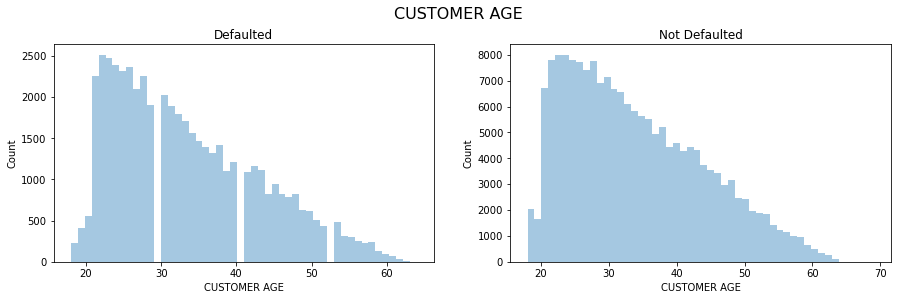

In [63]:
plot_2(defaulted, not_defaulted, 'CUSTOMER_AGE', 'LOAN_DEFAULT')

**Part 3**  
From the graphs obtained in part 1 and part 2, the features looks useful for analyzing loan default in future are given below.
1) Disbursed amount  
2) New accounts in last 6 months  
3) Pri-Santioned amount

**Part 4**  
There are multiple models which can be used to predict loan default for future. The best practice is to train and validate different models on the existing dataset and choose the best performing model.
Some of the models which can be used to predict loan default are mentioned below.  
1) Support Vector Regression (SVR)  
2) Logistic Regression  
3) Decision Trees  
4) Random Forest    

Sometimes the SVR performs very well and even compete with deep learning models as well. However, their is no specific rule/law for selecting a model. The best practice is to try different architectures and choose the best model for the particular type of dataset.
